1 Introduction ctrl+shift+alt+j : 改變到其它cells 中的單字
2 EDA
3 Modeling
4 Visualize predictions


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import chi2

In [10]:
data = pd.read_csv("data.csv") #
sample_submission = pd.read_csv("sample_submission.csv")
data.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [11]:
data_rmid = data.drop('id', axis=1)
data_rmid.shape

(98000, 29)

In [12]:
data_rmid.info() # float64(22), int64(7):(7-13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_00    98000 non-null  float64
 1   f_01    98000 non-null  float64
 2   f_02    98000 non-null  float64
 3   f_03    98000 non-null  float64
 4   f_04    98000 non-null  float64
 5   f_05    98000 non-null  float64
 6   f_06    98000 non-null  float64
 7   f_07    98000 non-null  int64  
 8   f_08    98000 non-null  int64  
 9   f_09    98000 non-null  int64  
 10  f_10    98000 non-null  int64  
 11  f_11    98000 non-null  int64  
 12  f_12    98000 non-null  int64  
 13  f_13    98000 non-null  int64  
 14  f_14    98000 non-null  float64
 15  f_15    98000 non-null  float64
 16  f_16    98000 non-null  float64
 17  f_17    98000 non-null  float64
 18  f_18    98000 non-null  float64
 19  f_19    98000 non-null  float64
 20  f_20    98000 non-null  float64
 21  f_21    98000 non-null  float64
 22

In [13]:
data_rmid.describe().T

,count,mean,std,min,25%,50%,75%,max
f_00,98000.0,0.001220,1.002801,-4.732235,-0.675226,0.002022,0.677271,4.490521
f_01,98000.0,0.005580,1.000742,-4.202795,-0.670985,0.006650,0.677746,4.324974
f_02,98000.0,-0.001042,1.001373,-4.377021,-0.672779,-0.000324,0.677086,4.560247
f_03,98000.0,-0.000700,1.000422,-4.010826,-0.672540,-0.003185,0.672097,4.399373
f_04,98000.0,-0.003522,1.003061,-4.535903,-0.682510,-0.003307,0.677589,4.050549
f_05,98000.0,-0.001612,1.000532,-4.300767,-0.675066,0.001024,0.673344,4.710316
f_06,98000.0,-0.003042,0.997434,-4.894525,-0.680421,-0.002053,0.668112,3.998595
f_07,98000.0,5.545918,3.691840,0.000000,3.000000,5.000000,8.000000,32.000000
f_08,98000.0,6.763061,4.152348,0.000000,4.000000,6.000000,9.000000,30.000000
f_09,98000.0,8.193163,5.904919,0.000000,4.000000,7.000000,11.000000,44.000000


1 EDA
    discreate features
    There are 7 discrete features: f_07 to f_13.
    Values are non-negative.
    Distributions are all similar, perhaps Poisson.

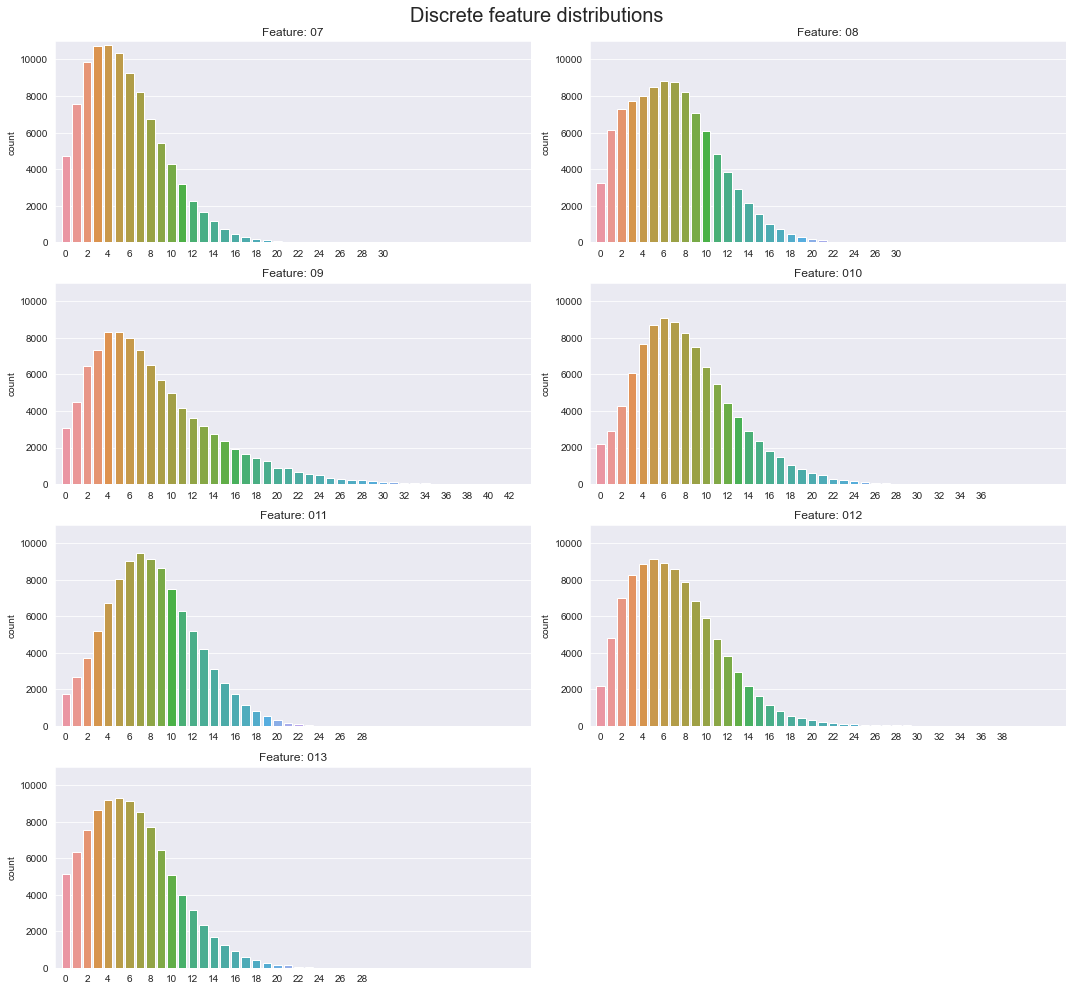

In [14]:
# Figure with subplots
fig=plt.figure(figsize=(15,14))

for i in range(7):
    # New subplot
    plt.subplot(4,2,i+1)
    feat_num=i+7 #
    sns.countplot(x=data_rmid.iloc[:,feat_num]) # x = f_08...

    # Aesthetics
    plt.title(f'Feature: 0{feat_num}')
    plt.xlim([-1,44])      # same scale for all plots
    plt.ylim([0,11000])   # same scale for all plots
    plt.xticks(np.arange(0,44,2))
    plt.xlabel('')

# Overall aesthetics
fig.suptitle('Discrete feature distributions',  size=20)
fig.tight_layout()  # Improves appearance a bit
plt.show()

In [15]:
import seaborn as sns

def display_kde(col_name):
    sns.kdeplot(data_rmid[col_name], shade=True)
    print(data_rmid[col_name].skew(), data_rmid[col_name].kurt())

In [16]:
sns.kdeplot?

<AxesSubplot:xlabel='f_00', ylabel='Density'>

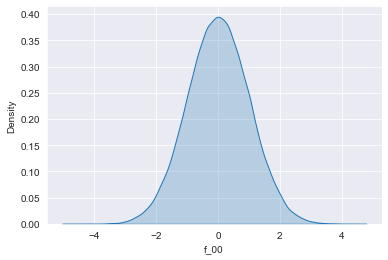

In [17]:
sns.kdeplot(data_rmid["f_00"], shade=True)

0.0024508350948588293 0.005622808617597119


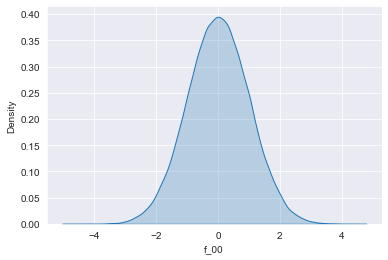

In [18]:
display_kde("f_00")

0.7971789402544943 0.6558489876821256


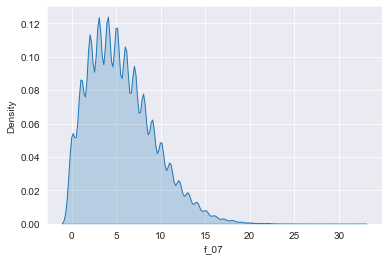

In [19]:
display_kde("f_07")

In [20]:
from sklearn.preprocessing import StandardScaler

powerTrans = StandardScaler()

In [21]:
def display_tranfrom_kde(col_name):
    # data_rmid[col_name] = np.log1p(data_rmid[col_name]) # ?
    data_rmid[[col_name]] = powerTrans.fit_transform(data_rmid[[col_name]]) # ?
    sns.kdeplot(data_rmid[col_name], shade=True)
    print(data_rmid[col_name].skew(), data_rmid[col_name].kurt())

0.0024508350948588345 0.005622808617597119


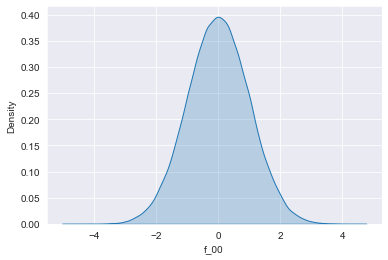

In [22]:
display_tranfrom_kde("f_00")

In [23]:
type(display_tranfrom_kde)

function

0.7971789402544947 0.6558489876821256


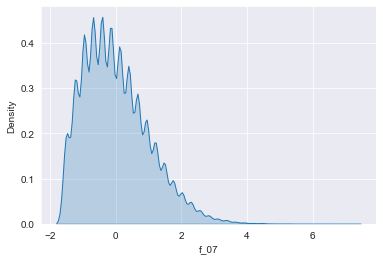

In [24]:
display_tranfrom_kde("f_07")

Continuous features

There are 22 continuous features: f_00 to f_06 and f_14 to f_28
Distributions are all Normal, usually with mean 0 and standard deviation 1.

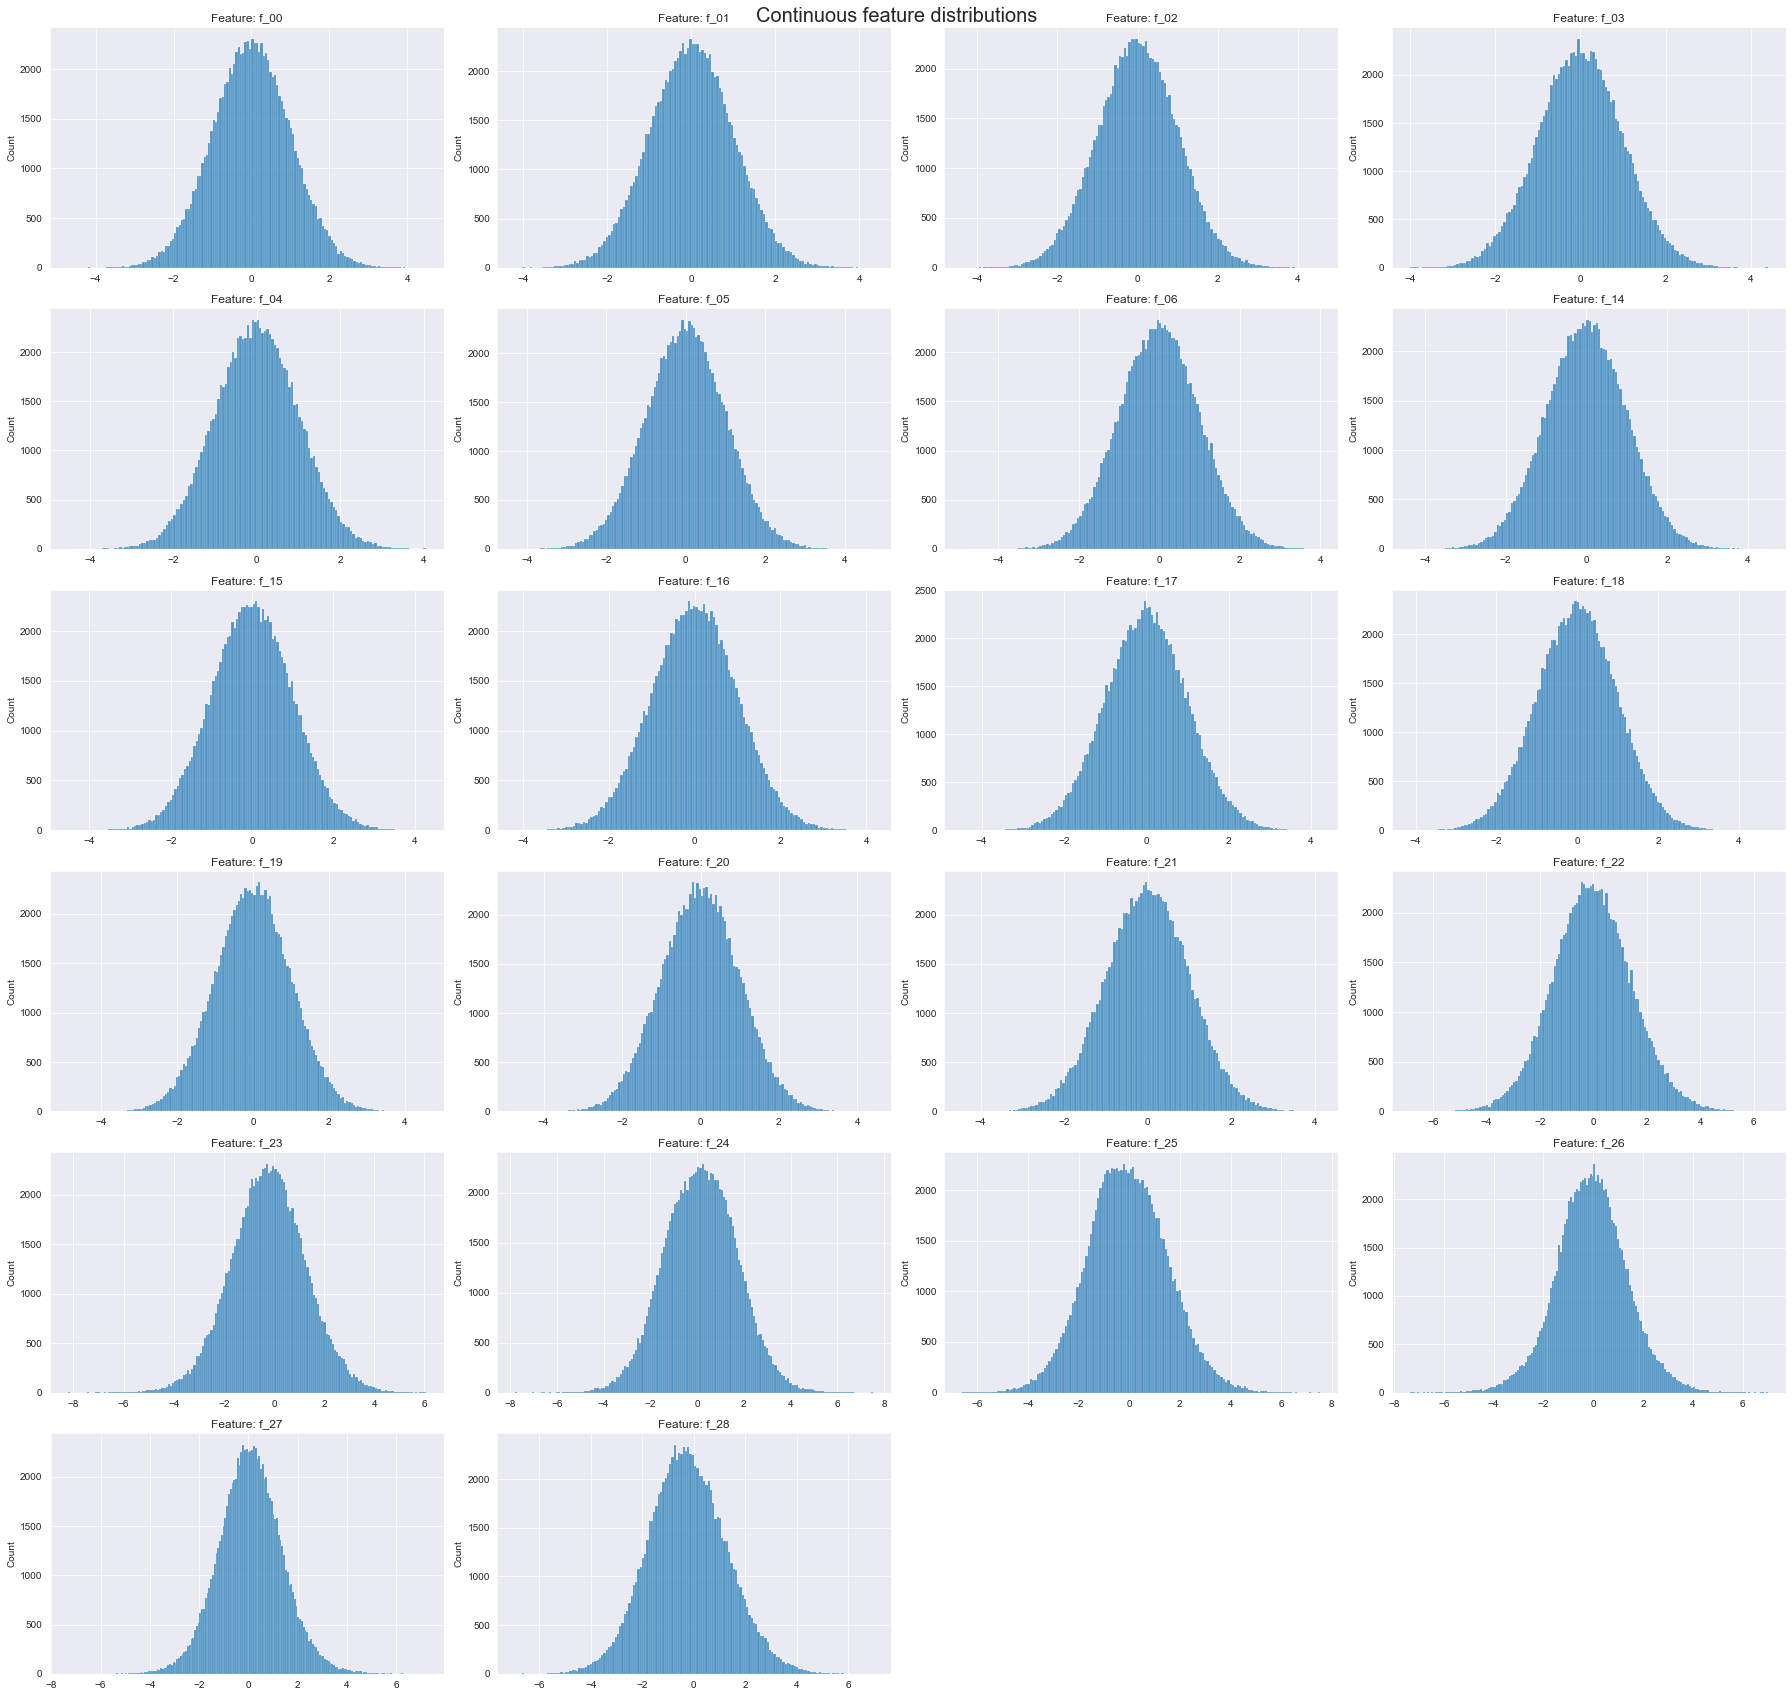

In [25]:
# Continuous features
cont_feats=[f'f_0{i}' for i in range(7)]
cont_feats=cont_feats + [f'f_{i}' for i in range(14,29)]

# Figure with subplots
fig=plt.figure(figsize=(25,24))

for i, f in enumerate(cont_feats):
    # New subplot
    plt.subplot(6,4,i+1)
    sns.histplot(x=data_rmid[f])

    # Aesthetics
    plt.title(f'Feature: {f}')
    plt.xlabel('')

# Overall aesthetics
fig.suptitle('Continuous feature distributions',  size=20)
fig.tight_layout()  # Improves appearance a bit
plt.show()

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.80)# This says we want retain the 80% of variance
pca.fit(data_rmid)
reduced = pca.transform(data_rmid)

In [27]:
reduced

array([[ 1.79759072, -6.1545769 ,  4.42778531,  1.17488692, -3.90086438,
         5.5099417 ],
       [-4.29023677, -0.55821751, -9.90741832,  2.95185253, -0.93298837,
        -0.50055123],
       [-4.34200787, -1.31892122,  3.59613341, -5.83410355,  0.47611556,
         1.55415433],
       ...,
       [ 3.04368896,  0.12602929,  2.63554703, -1.31809208, -3.8379789 ,
        -2.50639538],
       [ 3.39551695,  4.43502856, -1.84737535, -0.79301623, -3.67421286,
         0.97865222],
       [-8.36569408, -0.29168437,  2.60400607,  6.99756805, -0.05790449,
         4.37101256]])

Hypothesis testing

Shapiro-Wilk Test (Copied from Francisco Javier Gallego & Torch me)

This test is used to test whether a dataset is distributed normally or not. #

In [19]:
from termcolor import colored

In [20]:
# Univariate normality test
for col in data_rmid.columns:
    stat, p_value = shapiro(data_rmid[col]) # p_value <=> W
    alpha = 0.05    # significance level
    if p_value > alpha:
        result = colored('Accepted', 'green') # the green is normal distribution

    else:
        result = colored('Rejected','red')
    print('Feature: {}\t Hypothesis: {}'.format(col, result))

C:\Users\oldbi\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Feature: f_00	 Hypothesis: Accepted
Feature: f_01	 Hypothesis: Accepted
Feature: f_02	 Hypothesis: Accepted
Feature: f_03	 Hypothesis: Accepted
Feature: f_04	 Hypothesis: Accepted
Feature: f_05	 Hypothesis: Accepted
Feature: f_06	 Hypothesis: Accepted
Feature: f_07	 Hypothesis: Rejected
Feature: f_08	 Hypothesis: Rejected
Feature: f_09	 Hypothesis: Rejected
Feature: f_10	 Hypothesis: Rejected
Feature: f_11	 Hypothesis: Rejected
Feature: f_12	 Hypothesis: Rejected
Feature: f_13	 Hypothesis: Rejected
Feature: f_14	 Hypothesis: Accepted
Feature: f_15	 Hypothesis: Accepted
Feature: f_16	 Hypothesis: Accepted
Feature: f_17	 Hypothesis: Accepted
Feature: f_18	 Hypothesis: Accepted
Feature: f_19	 Hypothesis: Accepted
Feature: f_20	 Hypothesis: Accepted
Feature: f_21	 Hypothesis: Accepted
Feature: f_22	 Hypothesis: Rejected
Feature: f_23	 Hypothesis: Rejected
Feature: f_24	 Hypothesis: Rejected
Feature: f_25	 Hypothesis: Rejected
Feature: f_26	 Hypothesis: Rejected
Feature: f_27	 Hypothesis: R

Poisson Dispersion Test

This test is used to determine whether a feature is distributed according to a Poisson distribution or not.

why the features (7-13) is not Poisson distribution ?

Q-Q plots

Q-Q plots, aka Quantile-Quantile plots, are used to visually compare how similar two distributions are to each other. They consist of plotting the quantiles (i.e. regular intervals) of the observed distribution against the quantiles of the theoretical distribution. The closer the Q-Q plots are to forming a straight line, the more confident you can be that the observed and theoretical distributions ? are the same.

Normal Q-Q plots

In [21]:
stats.probplot?


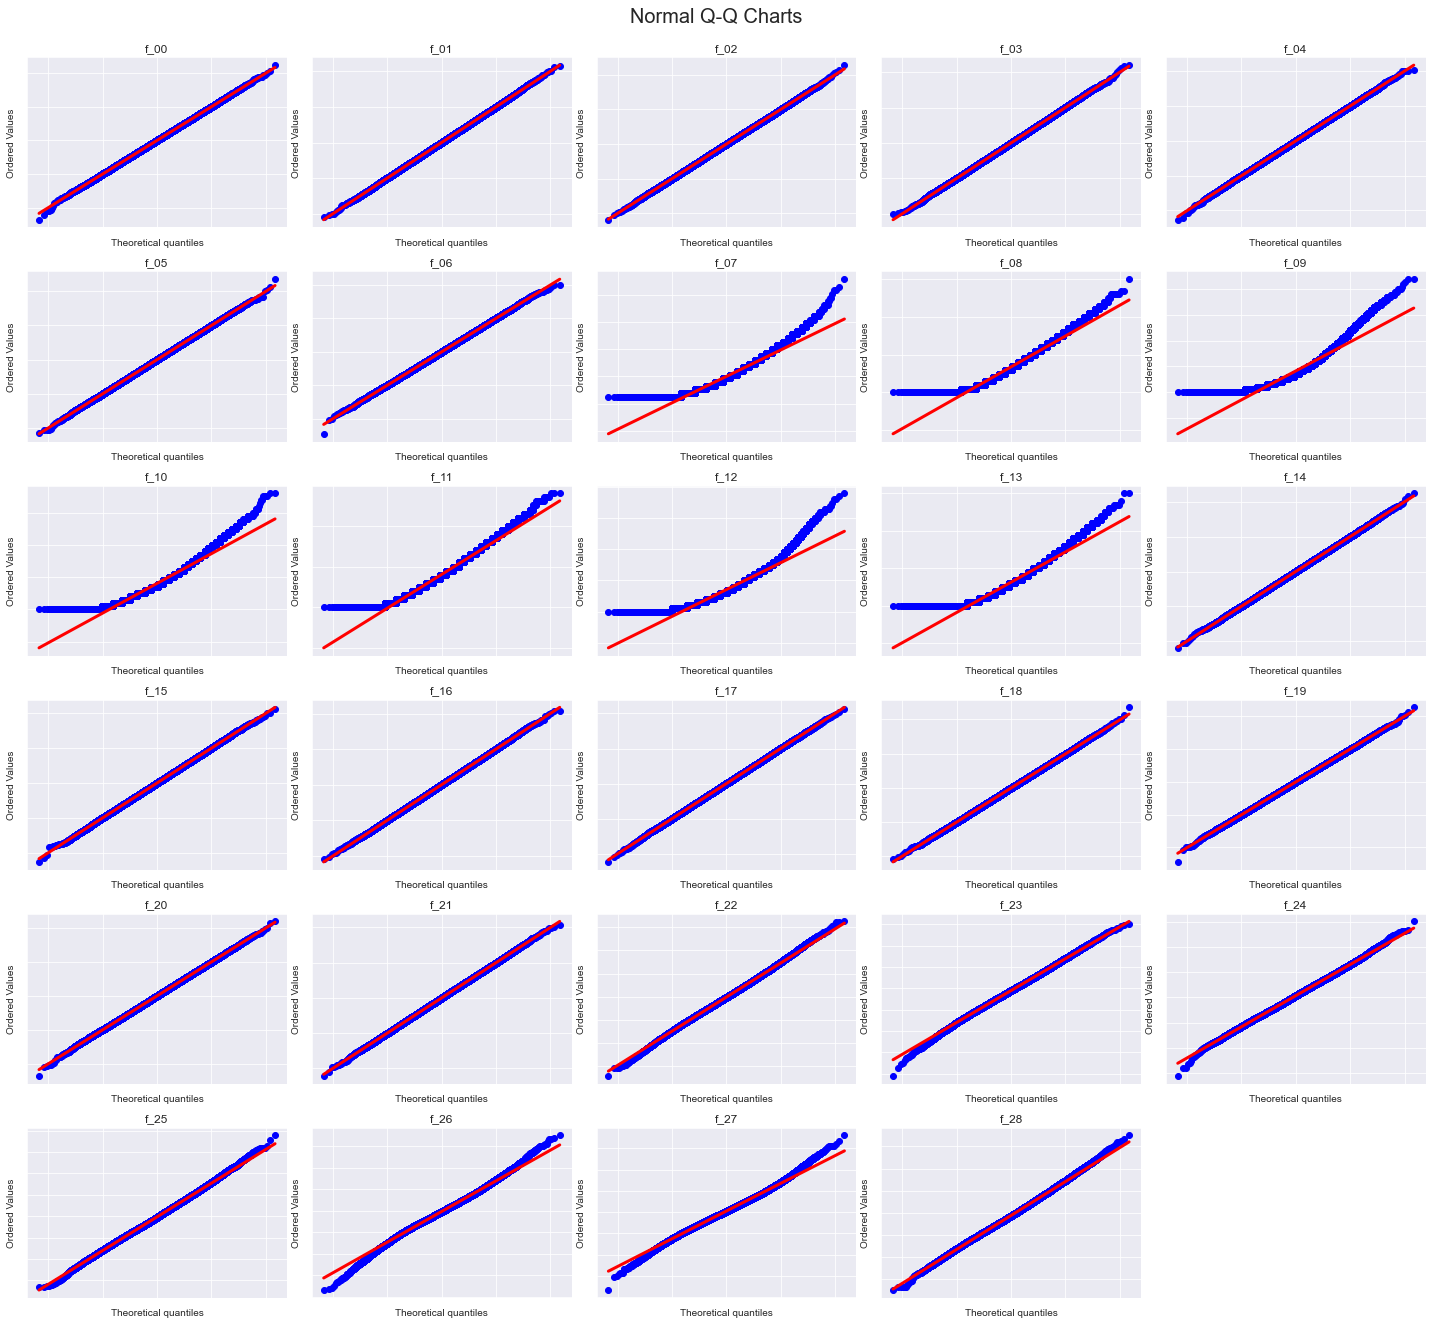

In [22]:
 # for i in range(data_rmid.shape[1]):# Normal Q-Q plots
figure = plt.figure(figsize = (20,18))
for i in range(len(data_rmid.columns)):

    # Q-Q plot
    ax = plt.subplot(6,5, i+1)
    stats.probplot(data_rmid.iloc[:,i], dist='norm', plot=plt) #

    # Aesthetics
    ax.get_lines()[0].set_markersize(6.0)
    ax.get_lines()[1].set_linewidth(3.0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.title(data_rmid.columns[i])

figure.tight_layout(h_pad=1.0, w_pad=0.5) # ?
plt.suptitle('Normal Q-Q Charts', y=1.02, fontsize=20)
plt.show()

We can see more clearly that these features are not distributed according to independent Poisson distributions.? However, some of them are quite close. It could be also that these features are made up of a mixture of Poisson distributions. Unfortunately, there isn't an easy way to verify this.

Correlations

Features f_00 to f_06 and f_14 to f_21 are independent of all other features. ?
Discrete features (f_07 to f_13) and features f_22 to f_28 are weakly dependent of each other.

Text(0.5, 1.0, 'Absolute correlations')

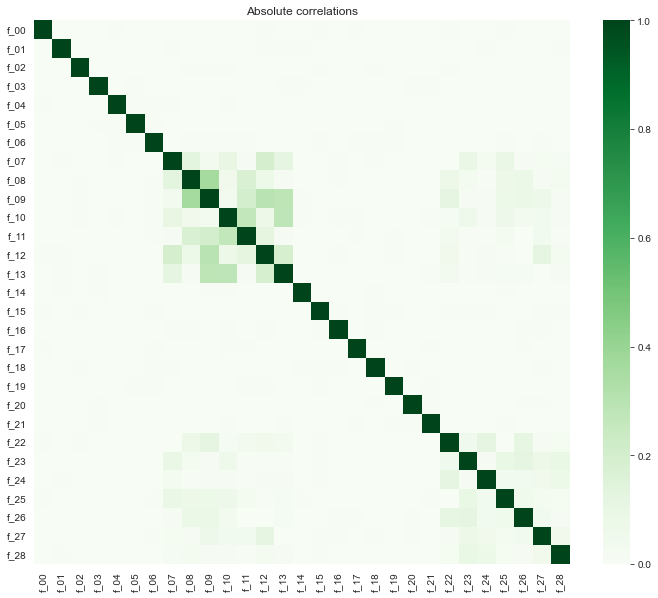

In [23]:
# Heatmap of correlations
plt.figure(figsize=(12,10))
sns.heatmap(data_rmid.corr().abs(), cmap='Greens', vmin=0, vmax=1)
plt.title('Absolute correlations')

In [28]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

In [29]:
from sklearn.preprocessing import StandardScaler # ScalerTransformer

scaled_data = pd.DataFrame(StandardScaler().fit_transform(reduced))

Now we will use PCA. PCA stands or Principal Component Analysis and used to reduce the dimensionality of data. There is no hard and fast rule to choose the optimal value for PCA but what we can choose is the percentage of variance we want to retain.

In [26]:
%%time

# Baseline
model_gmm = GaussianMixture(n_components=7, random_state=0)
preds_gmm = model_gmm.fit_predict(scaled_data)


Wall time: 7.32 s


In [27]:
np.arange(scaled_data.shape[1])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

We can plot the position of the center of each cluster to visualise how well each feature is able to separate the different clusters.?

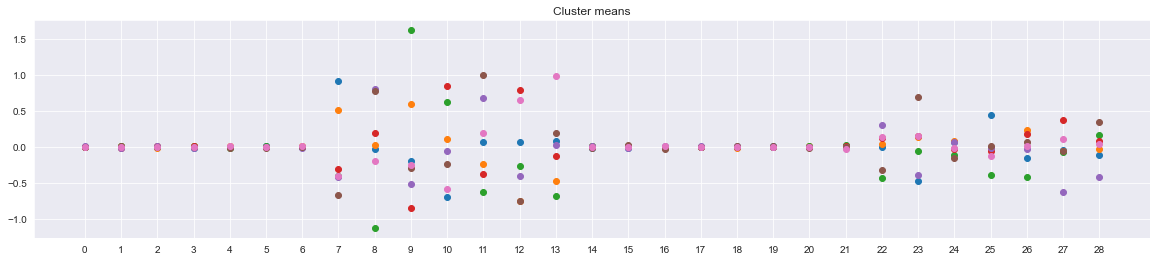

In [28]:
# Code from AmbrosM: https://www.kaggle.com/competitions/tabular-playground-series-jul-2022/discussion/334808
plt.figure(figsize=(20,4))
for i in range(model_gmm.means_.shape[0]): # ?
    plt.scatter(np.arange(scaled_data.shape[1]), model_gmm.means_[i]) # np.arange(scaled_data.shape[1])=29 * 1
plt.xticks(ticks=np.arange(scaled_data.shape[1]), labels=scaled_data.columns)
plt.title('Cluster means')
plt.show()

In [29]:
# Drop useless features
drop_feats = [f'f_0{i}' for i in range(7)]

drop_feats = drop_feats + [f'f_{i}' for i in range(14, 23)]

In [30]:
data_rmid_rm = data_rmid.drop(drop_feats, axis=1)
data_rmid_rm

,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.960479,13,14,5,13,6,6,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.960479,3,6,4,6,16,9,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,-0.147872,11,5,8,9,3,11,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,0.122997,2,13,8,9,6,4,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,0.664735,7,5,3,1,13,11,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,-0.147872,7,8,5,7,6,7,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,-0.689610,9,2,5,3,11,12,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,0.664735,9,10,7,5,4,3,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,-1.231348,8,11,11,3,9,5,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211


In [31]:
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture

In [32]:
%%time

# Remake predictions
Bayesiangaussian_model = BayesianGaussianMixture(n_components=7, covariance_type='full', max_iter=200, n_init=5, init_params='random', random_state=0) # ?

Wall time: 0 ns


In [33]:
predicts = Bayesiangaussian_model.fit_predict(data_rmid_rm)

C:\Users\oldbi\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


In [34]:
# Bayesiangaussian_model.means_[1]

In [35]:
# for i in range(model_gmm.means_.shape[0]): # ?
#     plt.scatter(np.arange(scaled_data.shape[1]), model_gmm.means_[i])
# plt.xticks(ticks=np.arange(scaled_data.shape[1]), labels=scaled_data.columns)

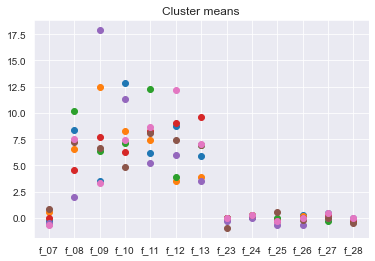

In [36]:
plt.Figure(figsize=(100, 40))
for i in range(Bayesiangaussian_model.means_.shape[0]): # 7
    plt.scatter(np.arange(data_rmid_rm.shape[1]), Bayesiangaussian_model.means_[i]) # 14
plt.xticks(ticks=np.arange(data_rmid_rm.shape[1]), labels=data_rmid_rm.columns)
plt.title('Cluster means')
plt.show()

In [37]:
sample_submission["Predicted"]= predicts
sample_submission.to_csv('sample_submission.csv', index=False) # index = False

In [38]:
sample_submission

,Id,Predicted
0,0,2
1,1,3
2,2,2
3,3,4
4,4,5
...,...,...
97995,97995,5
97996,97996,5
97997,97997,1
97998,97998,1


In [39]:
# sample_submission["Predicted"].unique()